# Sustainable Energy for All

SE4ALL database supports this initiative and provides country level historical data for access to electricity and non-solid fuel; share of renewable energy in total final energy consumption by technology; and energy intensity rate of improvement.

Last update: 06/30/2018

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading Data
https://databank.worldbank.org/source/sustainable-energy-for-all#

In [88]:
dfSE=pd.read_csv("c8af4998-3aa0-4d79-9215-033c6814116c_Data.csv")
display(dfSE)

,Country Name,Country Code,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
0,China,CHN,2016.0,YR2016,..,..,..,..,..,..,..,59.26,100.000000,100.000000,100.0
1,China,CHN,2015.0,YR2015,6.69006970167277,1398321,23.926817173663,9084482,12.4133525698911,5844158,73183146.5259,58.54,100.000000,100.000000,100.0
2,China,CHN,2014.0,YR2014,7.10422000054532,1280977,22.6091537829535,8744472,12.2238230065824,5665745,71536310.655768,57.8,99.996687,99.998489,100.0
3,China,CHN,2013.0,YR2013,7.85133380344517,1103418,20.2962273802567,8275653,11.8381669000852,5436567,69906541.019796,57.24,99.963948,99.983116,100.0
4,China,CHN,2012.0,YR2012,8.19029944077663,995264,19.9662489377563,8069989,11.9685670286267,4984731,67426526.339352,56.4,99.826197,99.916382,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Data from database: Sustainable Energy for All,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
dfSE.set_index("Country Code",inplace=True)

In [90]:
dfSE2=dfSE.iloc[:-5]
display(dfSE2.tail())

,Country Name,Time,Time Code,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY],Renewable electricity output (GWh) [4.1.2_REN.ELECTRICITY.OUTPUT],Renewable electricity share of total electricity output (%) [4.1_SHARE.RE.IN.ELECTRICITY],Renewable energy consumption (TJ) [3.1_RE.CONSUMPTION],Renewable energy share of TFEC (%) [2.1_SHARE.TOTAL.RE.IN.TFEC],Total electricity output (GWh) [4.1.1_TOTAL.ELECTRICITY.OUTPUT],Total final energy consumption (TFEC) (TJ) [1.1_TOTAL.FINAL.ENERGY.CONSUM],Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]
Country Code,,,,,,,,,,,,,,
USA,United States,1994.0,YR1994,8.35152168582419,336458,9.74723552434506,2102316,4.08864139839829,3451830,51418449.19008,..,100.0,100.0,100.0
USA,United States,1993.0,YR1993,8.52935320875437,355578,10.4843256121149,2159242,4.28152840674077,3391520,50431570.104744,..,100.0,100.0,100.0
USA,United States,1992.0,YR1992,8.61274699225872,324316,9.91611011689915,2357618,4.76308310810846,3270597,49497729.653016,..,100.0,100.0,100.0
USA,United States,1991.0,YR1991,8.74349537733587,350142,10.7574142290523,2219454,4.50791959377071,3254890,49234551.633684,..,100.0,100.0,100.0
USA,United States,1990.0,YR1990,8.66657670426795,369241,11.5286468488794,2053170,4.17546218583434,3202813,49172281.02234,..,100.0,100.0,100.0


## Techn acces for cooking

In [91]:
dfSEAccess=dfSE2[["Country Name","Time","Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]","Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL]","Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN]","Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]"]]
display(dfSEAccess)

,Country Name,Time,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT]
Country Code,,,,,,
CHN,China,2016.0,59.26,100.000000,100.0,100.000000
CHN,China,2015.0,58.54,100.000000,100.0,100.000000
CHN,China,2014.0,57.8,99.996687,100.0,99.998489
CHN,China,2013.0,57.24,99.963948,100.0,99.983116
CHN,China,2012.0,56.4,99.826197,100.0,99.916382
...,...,...,...,...,...,...
USA,United States,1994.0,..,100.000000,100.0,100.000000
USA,United States,1993.0,..,100.000000,100.0,100.000000
USA,United States,1992.0,..,100.000000,100.0,100.000000


In [92]:
#Cheking repeated countries
dfSEAccess['Country Repeated'] = dfSEAccess['Country Name'] == dfSEAccess['Country Name'].shift()
display(dfSEAccess)

,Country Name,Time,Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT],Access to electricity (% of rural population with access) [1.2_ACCESS.ELECTRICITY.RURAL],Access to electricity (% of urban population with access) [1.3_ACCESS.ELECTRICITY.URBAN],Access to electricity (% of total population) [1.1_ACCESS.ELECTRICITY.TOT],Country Repeated
Country Code,,,,,,,
CHN,China,2016.0,59.26,100.000000,100.0,100.000000,False
CHN,China,2015.0,58.54,100.000000,100.0,100.000000,True
CHN,China,2014.0,57.8,99.996687,100.0,99.998489,True
CHN,China,2013.0,57.24,99.963948,100.0,99.983116,True
CHN,China,2012.0,56.4,99.826197,100.0,99.916382,True
...,...,...,...,...,...,...,...
USA,United States,1994.0,..,100.000000,100.0,100.000000,True
USA,United States,1993.0,..,100.000000,100.0,100.000000,True
USA,United States,1992.0,..,100.000000,100.0,100.000000,True


In [93]:
#Saving non-repeated countries
NRep=[]
i=0
for Named in dfSEAccess["Country Repeated"]:
    if  (dfSEAccess.iloc[i]["Country Repeated"] == False):
        NRep.append(dfSEAccess.iloc[i]["Country Name"])
    i=i+1

print(NRep)

['China', 'India', 'United States']


In [131]:
#Saving non-repeated years
yearsBlock=[]
yearsDesc=[]
yearsAsc=[]

#Adding all years in list
for year in dfSEAccess["Time"]:
    yearsBlock.append(int(year))    

#Creating a list with years not repeated
for year2 in yearsBlock:
    if year2 not in yearsDesc:
        yearsDesc.append(year2)

#Ascending years
yearsAsc=yearsDesc[::-1]

print(yearsDesc, yearsAsc)

[2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990] [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]


In [52]:
# Random year by user
ranYear=input("Enter any year between 2000 and 2016")

try:
    number=int(ranYear)
    if (number>2000) & (number<2016):
        print("Success",ranYear)
    else:
        print("Fuera de límite")
except ValueError:
    print(f"try a year again")

Enter any year between 2000 and 2016 2009


Success 2009


In [24]:
#Y values for series
def Cooking(yearCooking):
    
    lbACook="Access to Clean Fuels and Technologies for cooking (% of total population) [2.1_ACCESS.CFT.TOT]"
    heightCook=[]
    
    i=0
    for year in dfSEAccess["Time"]:
        if  (year == yearCooking):
            try:
                number=float(dfSEAccess.iloc[i][lbACook])
            except ValueError:
                number=0 
            heightCook.append(number)
        i=i+1

    return heightCook


In [135]:
#Filtering years for series
firstYear=min(yearsAsc)
lastYear=max(yearsAsc)


for yearCooking in yearsAsc:
    if  (yearCooking == firstYear):
        heightFCook=Cooking(yearCooking)
        #No info for 10 years
        while all (x==0 for x in heightFCook):
            yearCooking=yearCooking+1
            heightFCook=Cooking(yearCooking)
        firstYear=yearCooking
        print(firstYear)
    elif (yearCooking == lastYear):
        heightLCook=Cooking(yearCooking)
    elif (int(yearCooking) == int(ranYear)):
        heightRCook=Cooking(yearCooking)
        
print(heightFCook,heightLCook,heightRCook)

2000
2000
[46.78, 22.15, 100.0] [59.26, 41.04, 100.0] [54.07, 32.82, 100.0]


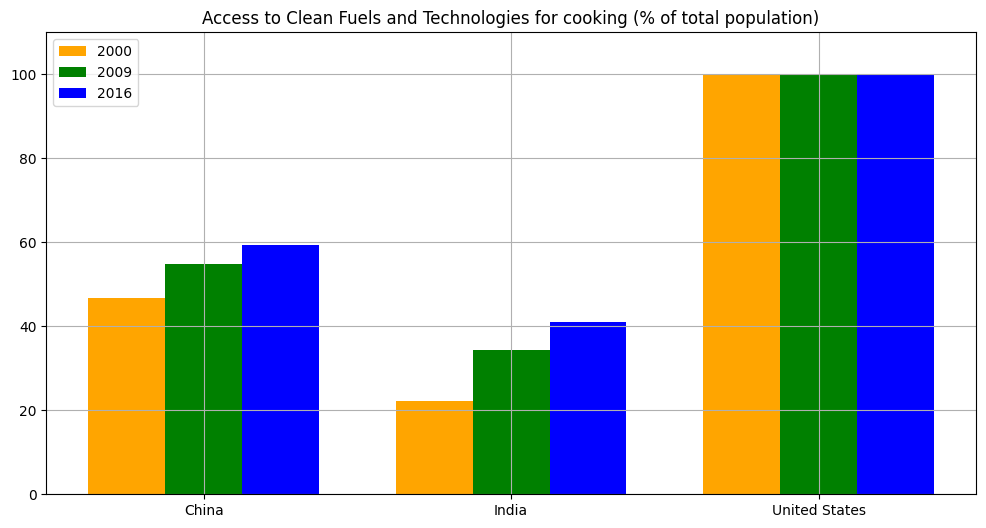

In [59]:
#Barplot
plt.figure(figsize=(12,6))
barWidth=0.25
plt.grid()
barIndex=np.arange(len(NRep))
plt.bar(barIndex,heightFCook,width=barWidth,label=firstYear,color="orange")
plt.bar(barIndex+barWidth,heightRCook,width=barWidth,label=ranYear,color="green")
plt.bar(barIndex+2*barWidth,heightLCook,width=barWidth,label=lastYear,color="blue")
plt.title("Access to Clean Fuels and Technologies for cooking (% of total population)")
plt.ylim(0,110)
plt.xticks(barIndex+barWidth,NRep)
plt.legend()
plt.show()

## Energy intensity level of primary energy

In [95]:
dfEIntensity=dfSE2[['Country Name',"Time","Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]"]]
display(dfEIntensity)
dfEIntensity.info()

,Country Name,Time,Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]
Country Code,,,
CHN,China,2016.0,..
CHN,China,2015.0,6.69006970167277
CHN,China,2014.0,7.10422000054532
CHN,China,2013.0,7.85133380344517
CHN,China,2012.0,8.19029944077663
...,...,...,...
USA,United States,1994.0,8.35152168582419
USA,United States,1993.0,8.52935320875437
USA,United States,1992.0,8.61274699225872


<class 'pandas.core.frame.DataFrame'>
Index: 81 entries, CHN to USA
Data columns (total 3 columns):
 #   Column                                                                                     Non-Null Count  Dtype  
---  ------                                                                                     --------------  -----  
 0   Country Name                                                                               81 non-null     object 
 1   Time                                                                                       81 non-null     float64
 2   Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]  81 non-null     object 
dtypes: float64(1), object(2)
memory usage: 2.5+ KB


In [132]:
#Y Values for series
def primEnergy(countryName):

    lbEIntensity="Energy intensity level of primary energy (MJ/2011 USD PPP) [6.1_PRIMARY.ENERGY.INTENSITY]"
    yValues=[]
    
    i=0
    for country2 in dfEIntensity.iloc[:,0]:
        if  (country2 == countryName):
            try:
                number=float(dfEIntensity.iloc[i][lbEIntensity])
            except ValueError:
                number=float(dfEIntensity.iloc[i+1][lbEIntensity])  
            yValues.append(number)
        i=i+1

    return yValues

In [136]:
#Series of each country
for countryName in NRep:
    match countryName:
        case "China":
            primEChDesc=primEnergy(countryName)
        case "India":
            primEInDesc=primEnergy(countryName)
        case "United States":
            primEUsDesc=primEnergy(countryName)

#Ascending (1990-2016) primary energy values
primEChAsc=primEChDesc[::-1]
primEInAsc=primEInDesc[::-1]
primEUsAsc=primEUsDesc[::-1]

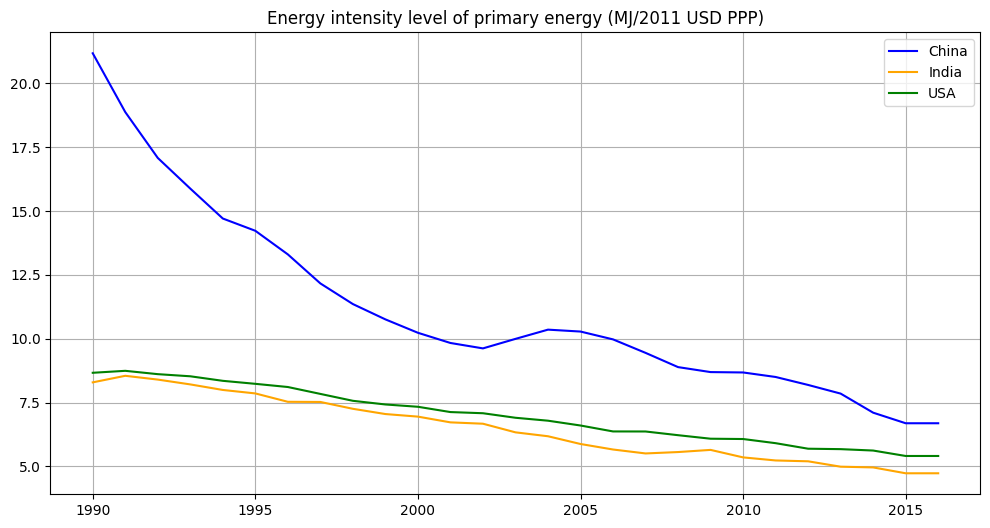

In [151]:
#Plot
plt.figure(figsize=(12,6))

plt.plot(yearsAsc,primEChAsc,label="China",color="blue")
plt.plot(yearsAsc,primEInAsc,label="India",color="orange")
plt.plot(yearsAsc,primEUsAsc,label="USA",color="green")

plt.legend()
plt.grid()

xvalues=np.arange(1990,2020,5)
plt.title("Energy intensity level of primary energy (MJ/2011 USD PPP)")

plt.xticks(xvalues)
plt.show()

## Prediction for energy intensity level of primary energy

In [237]:
# Predictive model
ranYear2=input("Enter any year after 2016 to obtain a prediction")
    
try:
    wish=int(ranYear2)
    if (wish>2016) & (wish<2100):
        print("Success",wish)
    else:
        print("Fuera de límite")
except ValueError:
    print(f"try a year again")

arimaYears = np.arange(lastYear, wish+1)
arimaFullYears = np.concatenate([yearsAsc, arimaYears])

Enter any year after 2016 to obtain a prediction 2040


Success 2040


In [238]:
#Y Values for series
from statsmodels.tsa.arima.model import ARIMA

def arimaPEnergy(y):
    
    modelArima = ARIMA(y, order=(1, 1, 1))
    modelFitArima = modelArima.fit()
    forecastArima = modelFitArima.forecast(steps=(wish-lastYear)+1)
    arimaFullPred = np.concatenate([y, forecastArima])

    #Wish year data
    predWish = forecastArima[-1]
    
    return arimaFullPred,predWish

In [239]:
#Series of each country and desired year data
for countryName in NRep:
    match countryName:
        case "China":
            arimaCHN,WC=arimaPEnergy(primEChAsc)
        case "India":
            arimaIND,WI=arimaPEnergy(primEInAsc)
        case "United States":
            arimaUSA,WU=arimaPEnergy(primEUsAsc)

In [240]:
print(WC,WI,WU)

7.700134534154126 1.6432314476540548 2.507559241505996


In [241]:
print(arimaCHN,arimaIND,arimaUSA)

[21.17944283 18.87711071 17.08054666 15.87974562 14.70799587 14.22762923
 13.3030465  12.16643641 11.35795951 10.75796138 10.23305051  9.83358331
  9.62184206  9.99420998 10.35599738 10.28130878  9.97448941  9.44675565
  8.88879012  8.69387284  8.67917854  8.5023195   8.19029944  7.8513338
  7.10422     6.6900697   6.6900697   6.76653256  6.83846378  6.90613196
  6.96978973  7.02967477  7.08601069  7.13900782  7.18886403  7.23576548
  7.27988729  7.32139418  7.36044114  7.39717395  7.43172976  7.4642376
  7.49481884  7.52358766  7.55065148  7.57611134  7.6000623   7.62259379
  7.64378994  7.66372988  7.68248806  7.70013453] [8.29159791 8.54836655 8.40018853 8.21116168 7.99411301 7.8581603
 7.53016367 7.52418202 7.25603779 7.05054708 6.94959487 6.72480638
 6.67200102 6.33392173 6.18110787 5.87751947 5.66184905 5.5076493
 5.56214241 5.64671193 5.35317924 5.23298571 5.19964332 4.98862544
 4.9601495  4.73091045 4.73091045 4.60493008 4.47915843 4.35359517
 4.22823995 4.10309241 3.97815223 3

🔹 China 2040: 7.70 MJ/USD
🔹 India 2040: 1.64 MJ/USD
🔹 USA 2040: 2.51 MJ/USD


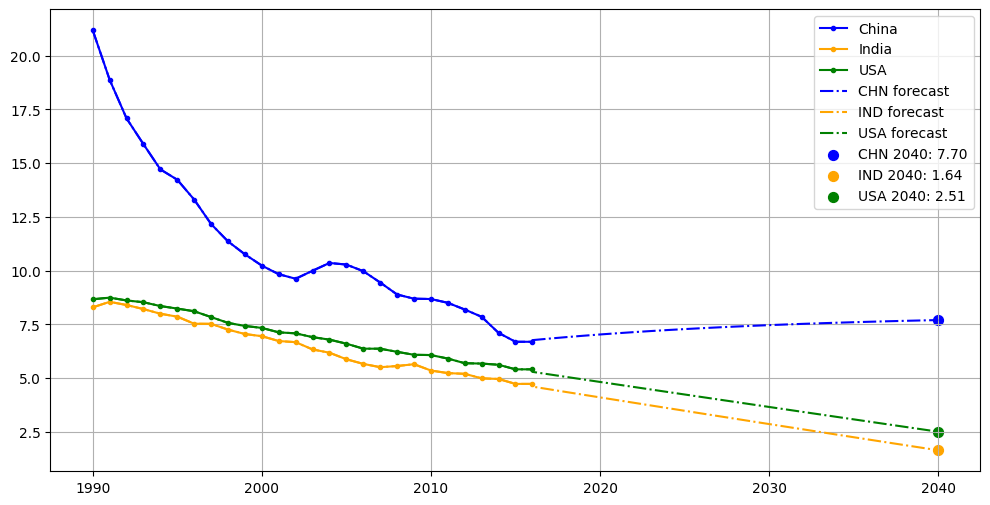

In [259]:
# Results
print(f"🔹 China {wish}: {WC:.2f} MJ/USD")
print(f"🔹 India {wish}: {WI:.2f} MJ/USD")
print(f"🔹 USA {wish}: {WU:.2f} MJ/USD")

#Plot
plt.figure(figsize=(12,6))

# Historic values
plt.plot(yearsAsc,primEChAsc,label="China",color="blue",marker='.')
plt.plot(yearsAsc,primEInAsc,label="India",color="orange",marker='.')
plt.plot(yearsAsc,primEUsAsc,label="USA",color="green",marker='.')

# Forecast
plt.plot(arimaFullYears, arimaCHN, label='CHN forecast',color="blue", linestyle='-.')
plt.plot(arimaFullYears, arimaIND, label='IND forecast',color="orange", linestyle='-.')
plt.plot(arimaFullYears, arimaUSA, label='USA forecast',color="green", linestyle='-.')

#  Mark desired year info
plt.scatter([wish], [WC], color='blue', s=50, label=f'CHN {wish}: {WC:.2f}')
plt.scatter([wish], [WI], color='orange', s=50, label=f'IND {wish}: {WI:.2f}')
plt.scatter([wish], [WU], color='green', s=50, label=f'USA {wish}: {WU:.2f}')


plt.legend()
plt.grid()
plt.show()
